# Load Dependency

In [3]:
import pandas as pd
from util import load_csv
import seaborn as sns 
import matplotlib.pyplot as plt
import sqlite3

# Load Dataset

In [4]:
def load_csv():
    # Election 2020
    president_state = pd.read_csv('Election2020/president_state.csv')
    president_county_candidate = pd.read_csv('Election2020/president_county_candidate.csv')
    # Election 2016
    cnx = sqlite3.connect('Election2016/database.sqlite')
    election2016_votes = pd.read_sql_query("SELECT * FROM primary_results", cnx)
    us_covid19_daily = pd.read_csv('COVID/us_covid19_daily.csv')
    us_counties_covid19_daily = pd.read_csv('COVID/us_counties_covid19_daily.csv')
    return president_state, president_county_candidate, us_covid19_daily, us_counties_covid19_daily, election2016_votes

In [5]:
president_state, president_county_candidate, us_covid19_daily, us_counties_covid19_daily,election2016_votes = load_csv()

In [6]:
president_state.head()

,state,total_votes
0,Delaware,504010
1,District of Columbia,344356
2,Florida,11067456
3,Georgia,4997716
4,Hawaii,574469


In [7]:
president_county_candidate

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


# Data preprocessing

In [8]:
us_covid19_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      320 non-null    int64  
 1   states                    320 non-null    int64  
 2   positive                  320 non-null    int64  
 3   negative                  320 non-null    int64  
 4   pending                   278 non-null    float64
 5   hospitalizedCurrently     265 non-null    float64
 6   hospitalizedCumulative    278 non-null    float64
 7   inIcuCurrently            256 non-null    float64
 8   inIcuCumulative           257 non-null    float64
 9   onVentilatorCurrently     257 non-null    float64
 10  onVentilatorCumulative    250 non-null    float64
 11  recovered                 257 non-null    float64
 12  dateChecked               320 non-null    object 
 13  death                     301 non-null    float64
 14  hospitaliz

In [9]:
us_covid19_daily['date'] = pd.to_datetime(us_covid19_daily['date'],format='%Y%m%d')
us_covid19_daily.head(3)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,2020-12-06,56,14534035,161986294,13592.0,101487.0,585676.0,20145.0,31946.0,7094.0,...,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
1,2020-12-05,56,14357264,160813704,13433.0,101190.0,583420.0,19950.0,31831.0,7005.0,...,202429337,2020-12-05T24:00:00Z,0,0,2445,3316,1526995,211073,2169756,6249216c5f097c94ce33a811dab011a483a42404
2,2020-12-04,56,14146191,159286709,12714.0,101276.0,580104.0,19858.0,31608.0,6999.0,...,200259581,2020-12-04T24:00:00Z,0,0,2563,4652,1260657,224831,1854869,ae30ea088584335ba4d57ee927f8dbda6add74db


# Visualize COVID cases data

In [10]:
positive = pd.concat([us_covid19_daily['date'], us_covid19_daily['positive']],axis=1)
positive_month = positive.set_index('date').resample('1M').sum()
positive_month.head()

,positive
date,
2020-01-31,0
2020-02-29,18
2020-03-31,1217580
2020-04-30,19644427
2020-05-31,45281185


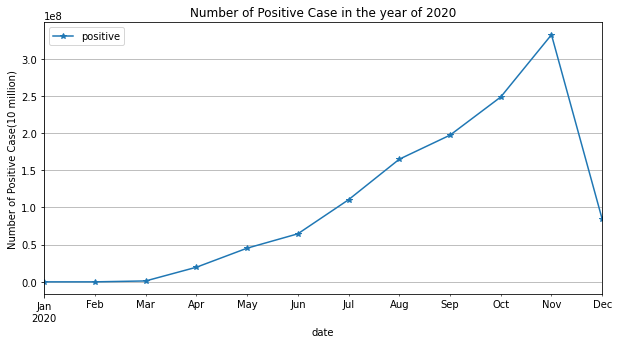

In [11]:
positive_month.plot(figsize = (10,5),marker='*',grid=True,
                    fontsize=10,ylabel = 'Number of Positive Case(10 million)',
                    title='Number of Positive Case in the year of 2020')
plt.show()

As the visualization has shown, March is when COVID happened. The number of cases rises dramatically as the figure above has shown.

# Visualize Election results in 2016

In [12]:
election_result_2016 = election2016_votes.groupby('candidate').sum().sort_values(by='votes',ascending=False)
election_result_2016

,votes,fraction_votes
candidate,,
Hillary Clinton,15692452,1939.776121
Donald Trump,13302541,1671.854969
Bernie Sanders,11959102,2074.393879
Ted Cruz,7603006,873.022095
John Kasich,4159949,440.609220
Marco Rubio,3321076,375.479603
Ben Carson,564553,98.373066
Jeb Bush,94411,6.901265
Chris Christie,24353,1.937211


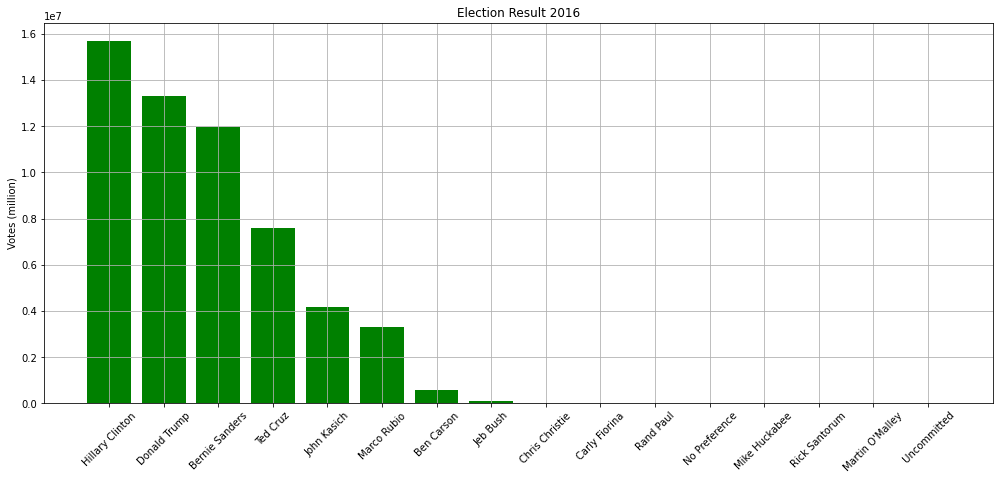

In [13]:
fig, ax = plt.subplots(figsize=(17,7))
plt.bar(election_result_2016.index, election_result_2016['votes'],color='g')
plt.xticks(rotation = 45)
plt.title('Election Result 2016')
plt.ylabel("Votes (million)")
plt.grid(True)
plt.show()

In [14]:
president_county_candidate

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


In [15]:
election_result_2020 = president_county_candidate.groupby('candidate').sum().sort_values(by='total_votes',ascending=False)
election_result_2020

,total_votes,won
candidate,,
Joe Biden,82046434,1410
Donald Trump,74585705,3219
Jo Jorgensen,1874183,1
Howie Hawkins,404835,0
Write-ins,254274,3
Rocky De La Fuente,88158,0
Gloria La Riva,85453,0
Kanye West,66367,0
Don Blankenship,59924,0


# Visualize Election results in 2020

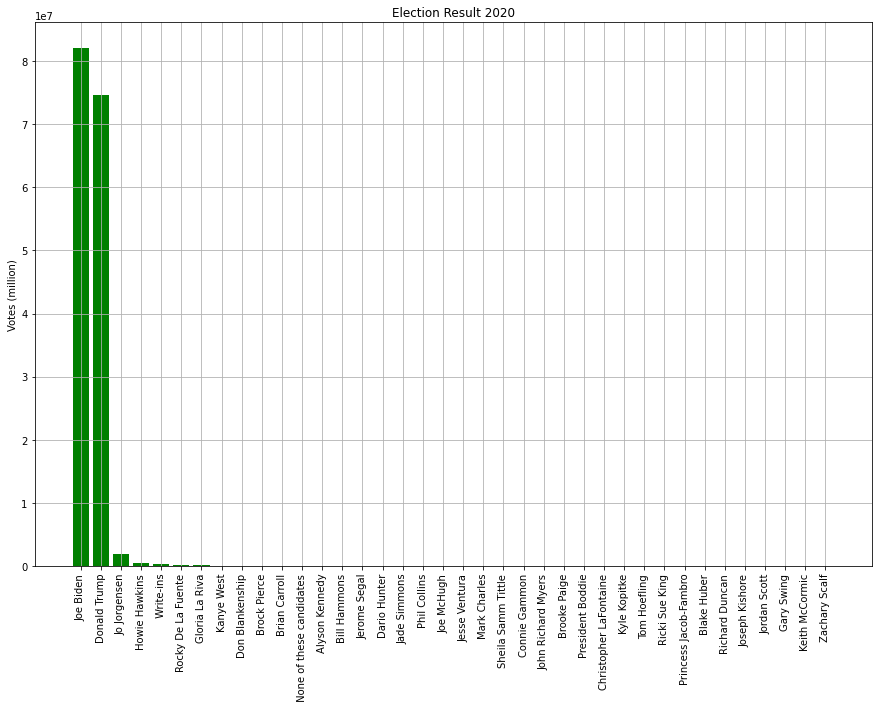

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(election_result_2020.index, election_result_2020['total_votes'],color='g')
plt.xticks(rotation = 90)
plt.title('Election Result 2020')
plt.ylabel("Votes (million)")
plt.grid(True)
plt.show()

As a well-known fact, "Donald Trump" didn't win the election in 2020. There are no direct facts showing that his loss has anything to do with COVID. However, November seems to be having an enormous high COVID positive case which could potentially be a reason that leads to his loss.

# Let's visulaize the election result based on state

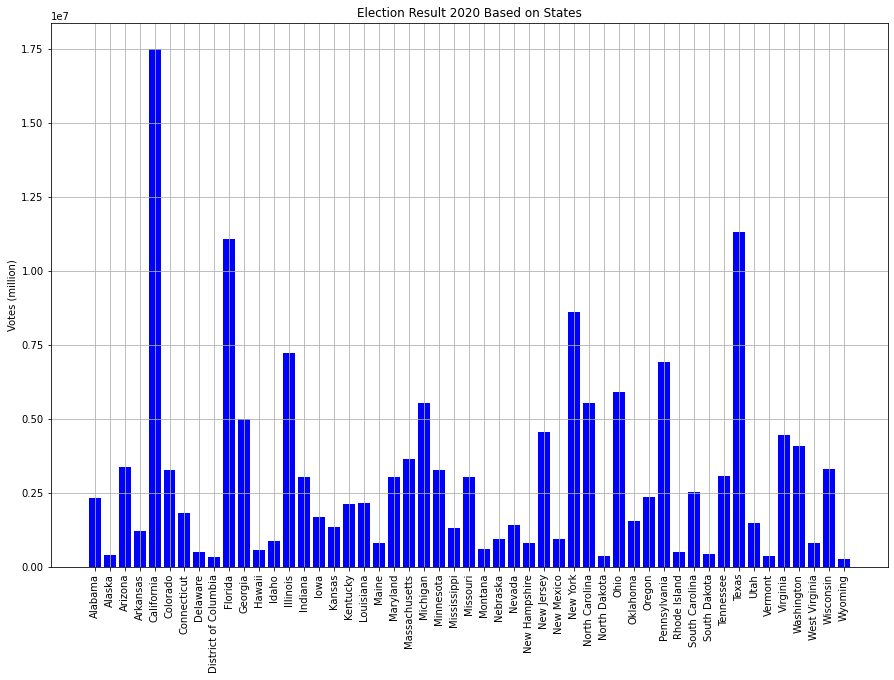

In [17]:
state_election_2020 = president_county_candidate.groupby('state').sum()

fig, ax = plt.subplots(figsize=(15,10))
plt.bar(state_election_2020.index, state_election_2020['total_votes'],color='b')
plt.xticks(rotation = 90)
plt.title('Election Result 2020 Based on States')
plt.ylabel("Votes (million)")
plt.grid(True)
plt.show()

As you can see, California and Texas, and Florida have an enormous number of votes. Surprisingly, New York state wasn't even top 3 in term of number of votes.

# Let's do the same thing with 2016

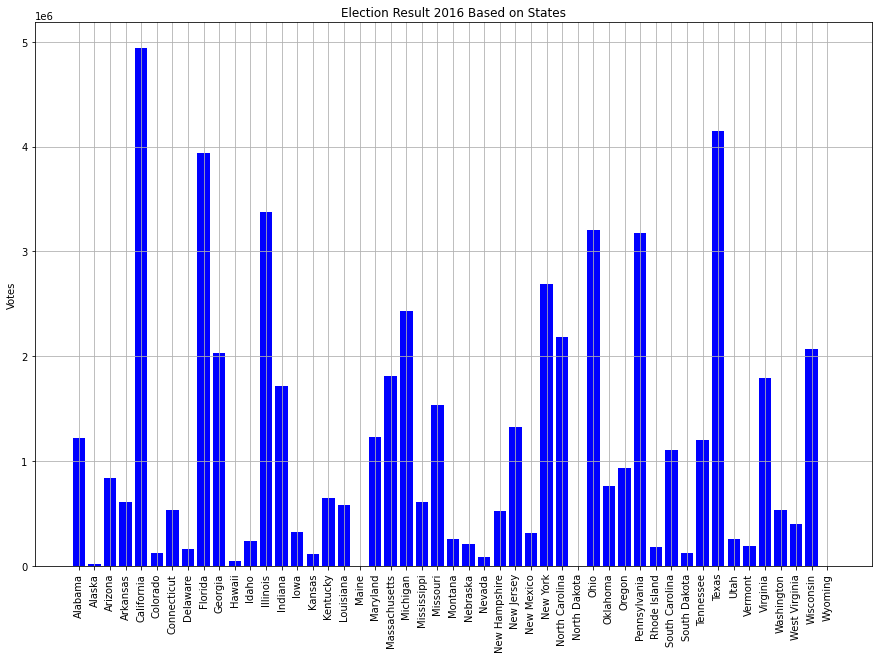

In [18]:
state_election_2016 = election2016_votes.groupby('state').sum()

fig, ax = plt.subplots(figsize=(15,10))
plt.bar(state_election_2016.index, state_election_2016['votes'],color='b')
plt.xticks(rotation = 90)
plt.title('Election Result 2016 Based on States')
plt.ylabel("Votes")
plt.grid(True)
plt.show()

If you pay attention to the number of votes, you would notice that more people voted in the election of 2020 than in the election of 2016. One hypothesis we can propose would be. People tend to be more willing to express their political needs. And voting is a method for the general public to express their opinions.

In [19]:
print("Total vote of election 2016:",state_election_2016.votes.sum())
print("Total vote of election 2020:",state_election_2020.total_votes.sum())

Total vote of election 2016: 56759187
Total vote of election 2020: 159608237


In [20]:
us_counties_covid19_daily

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0


In [21]:
temp = us_counties_covid19_daily.groupby(['state','county']).sum()
michigan_top_10_covid = temp.loc['Michigan'].sort_values('cases',ascending = False)[:10]
michigan_top_10_covid

,fips,cases,deaths
county,,,
Wayne,7090173.0,7388297,642107.0
Oakland,7079875.0,4285403,260276.0
Macomb,6994532.0,3150737,222695.0
Kent,7015789.0,2236893,35473.0
Genesee,6824838.0,1089288,69350.0
Washtenaw,7037309.0,884762,27075.0
Ottawa,6952974.0,745641,14002.0
Jackson,6883800.0,635268,15006.0
Kalamazoo,6727866.0,617917,19161.0


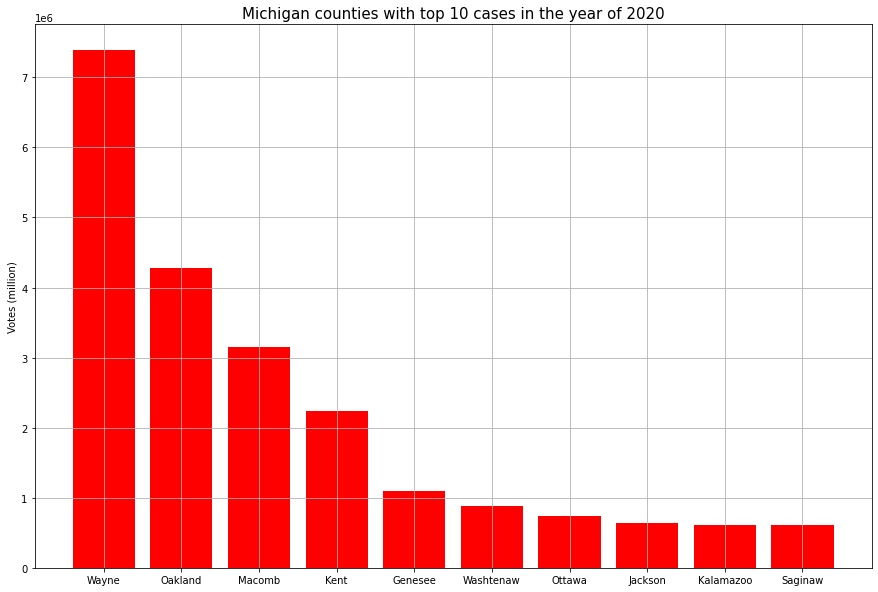

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(michigan_top_10_covid.index, michigan_top_10_covid['cases'],color='r')
plt.title('Michigan counties with top 10 cases in the year of 2020',fontsize=15)
plt.ylabel("Votes (million)")
plt.grid(True)
plt.show()

As the graph suggested, Wayne county has the largest amount of cases. This makes sense because Wayne county is very close to the city of Detriot where there is a large desity of population.

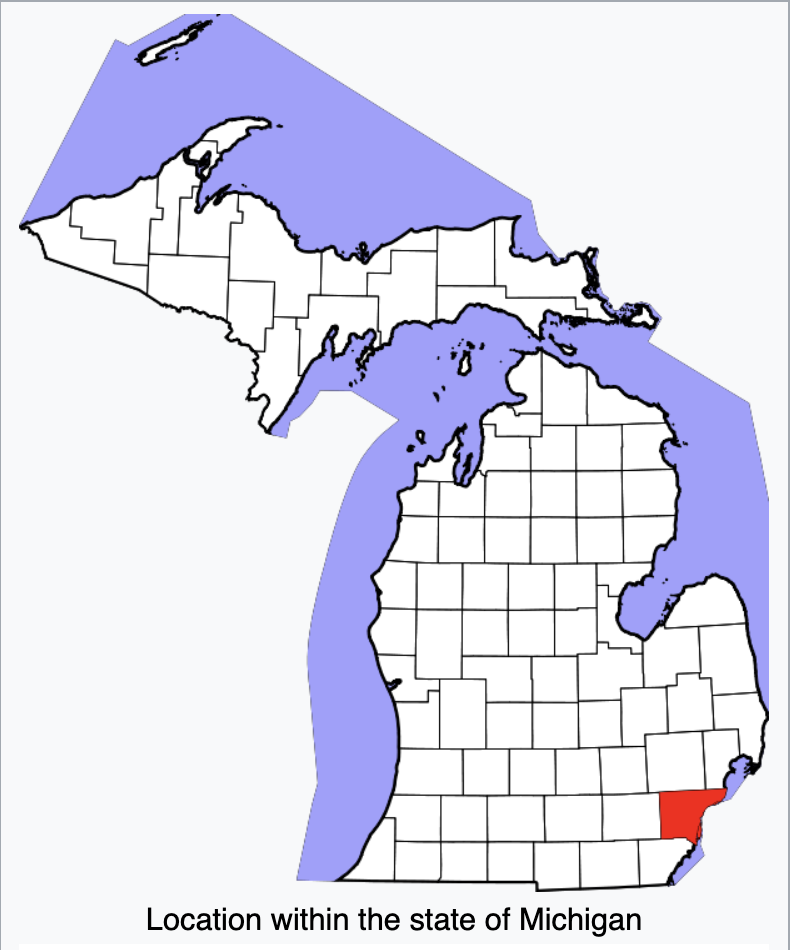

In [23]:
from PIL import Image
Image.open('img/wayne_county.png')

We can also verify this by looking at the voter counts for the state of Michigan.

In [24]:
top10_2020_election = president_county_candidate.groupby(['state','county']).sum().loc['Michigan'].sort_values('total_votes',ascending=False)[: 10]
top10_2020_election

,total_votes,won
county,,
Wayne County,872469,1
Oakland County,770351,1
Macomb County,494256,1
Kent County,361048,1
Genesee County,221360,1
Washtenaw County,216418,1
Ottawa County,168713,1
Ingham County,144550,1
Kalamazoo County,143414,1


In [25]:
top10_2016_election = election2016_votes.groupby(['state','county']).sum().loc['Michigan'].sort_values('votes',ascending=False)[: 10]
top10_2016_election

,votes,fraction_votes
county,,
Wayne,399569,1.933
Oakland,359076,1.936
Macomb,212059,1.908
Kent,164305,1.962
Washtenaw,103609,1.949
Genesee,97341,1.928
Ottawa,79000,1.936
Ingham,67083,1.922
Kalamazoo,63171,1.924


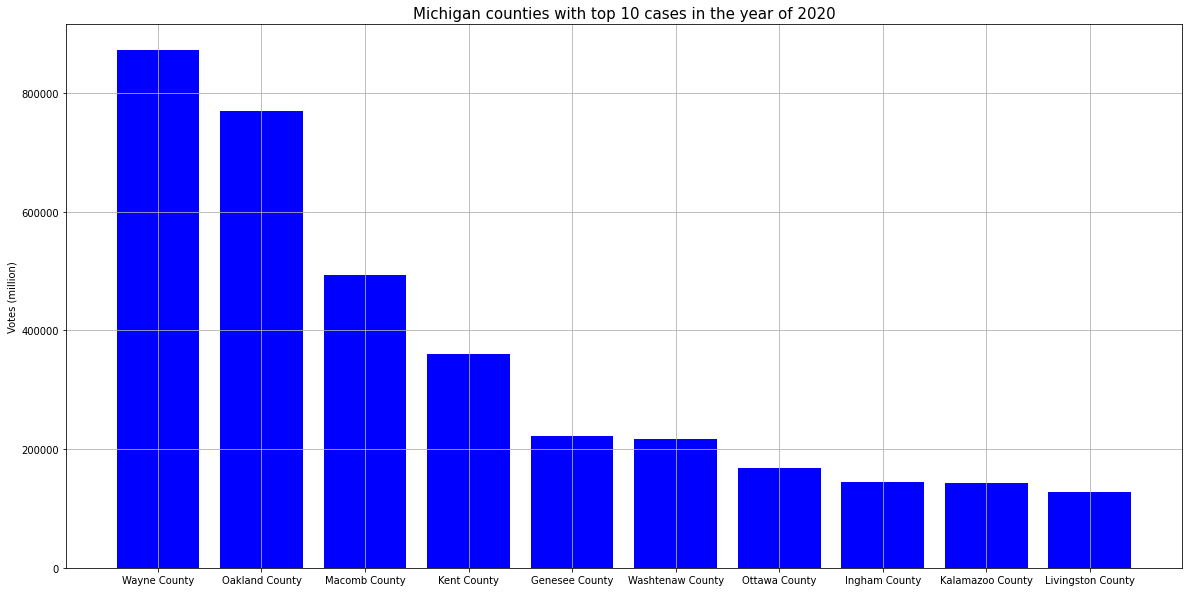

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(top10_2020_election.index, top10_2020_election['total_votes'],color='b')
plt.title('Michigan counties with top 10 cases in the year of 2020',fontsize=15)
plt.ylabel("Votes (million)")
plt.grid(True)
plt.show()

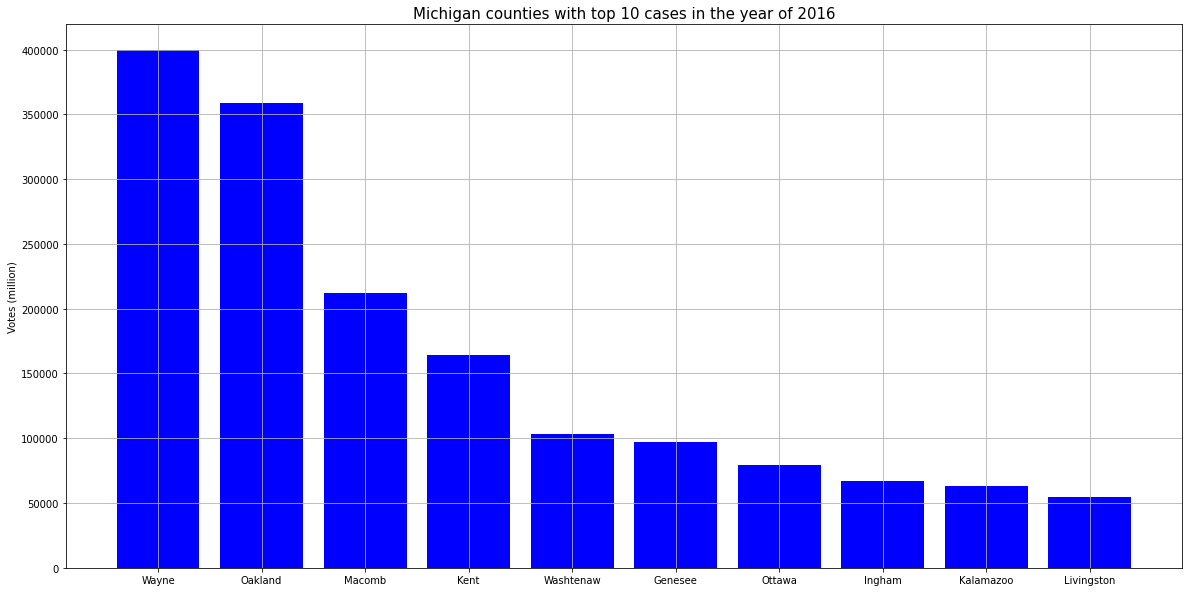

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(top10_2016_election.index, top10_2016_election['votes'],color='b')
plt.title('Michigan counties with top 10 cases in the year of 2016',fontsize=15)
plt.ylabel("Votes (million)")
plt.grid(True)
plt.show()

In [28]:
state_election_2020.sort_values('total_votes')

,total_votes,won
state,,
Wyoming,276765,23
District of Columbia,344356,8
North Dakota,361819,53
Vermont,367428,246
Alaska,391346,40
South Dakota,422609,66
Delaware,504010,3
Rhode Island,516383,39
Hawaii,574469,4


In [35]:
top_5_party_won = president_county_candidate.groupby('party').sum().sort_values('total_votes',ascending=False).head(5)
top_5_party_won

,total_votes,won
party,,
DEM,82046434,1410
REP,74585705,3219
LIB,1874183,1
GRN,407508,0
WRI,254274,3


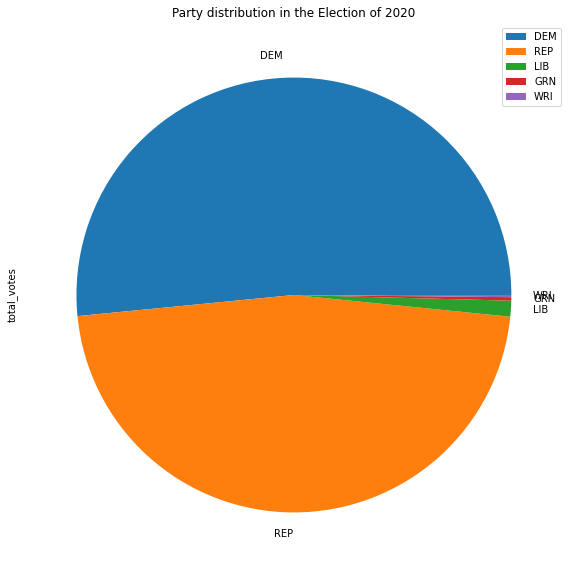

In [47]:
top_5_party_won.plot.pie(y='total_votes', figsize=(10, 10),title="Party distribution in the Election of 2020")
plt.show()

As the figure has suggeted, Democrats and Republican are still the major parties in the country.

In [59]:
temp = pd.concat([us_covid19_daily['date'], us_covid19_daily['negative'],us_covid19_daily['positive'],us_covid19_daily['hospitalizedCurrently']],axis=1)
temp = temp.set_index('date').resample('1M').sum()
temp

,negative,positive,hospitalizedCurrently
date,,,
2020-01-31,0,0,0.0
2020-02-29,24,18,0.0
2020-03-31,6154535,1217580,97274.0
2020-04-30,86387804,19644427,1510443.0
2020-05-31,308351025,45281185,1375838.0
2020-06-30,672345232,64585095,926598.0
2020-07-31,1248809176,110430521,1613938.0
2020-08-31,1912786285,164902575,1392131.0
2020-09-30,2468417775,197249828,935484.0


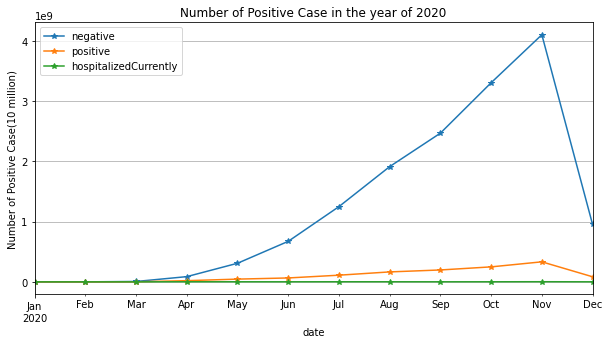

In [58]:
temp.plot(figsize = (10,5),marker='*',grid=True,
                    fontsize=10,ylabel = 'Number of Positive Case(10 million)',
                    title='Number of Positive Case in the year of 2020')
plt.show()

As the graph suggested, even though the positive cases are increasing, but the negative cases are also increasing as more and more test conducted.